### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 26.5 MB 32.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [ ]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎


In [ ]:
print(df_data.shape)
print(df_data.columns)
print(df_data.head())
print(df_data.tail())
df_data.count()

(2000, 96)
Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBAR

ID          2000
EARNINGS    2000
S           2000
EXP         2000
FEMALE      2000
            ... 
MSA11NO     2000
MSA11NCC    2000
MSA11CC     2000
MSA11NK     2000
MSA11NIC    2000
Length: 96, dtype: int64

## Data Cleaning 



In [ ]:
print(df_data.info())
df_data.fillna(0, inplace=True)
df_data=df_data.drop_duplicates()
print(f'NaN values? {df_data.isna().values.any()}')
print(f'duplicates? {df_data.duplicated().values.any()}')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1995
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1487 non-null   int64  
 1   EARNINGS  1487 non-null   float64
 2   S         1487 non-null   int64  
 3   EXP       1487 non-null   float64
 4   FEMALE    1487 non-null   int64  
 5   MALE      1487 non-null   int64  
 6   BYEAR     1487 non-null   int64  
 7   AGE       1487 non-null   int64  
 8   AGEMBTH   1487 non-null   float64
 9   HHINC97   1487 non-null   float64
 10  POVRAT97  1487 non-null   float64
 11  HHBMBF    1487 non-null   int64  
 12  HHBMOF    1487 non-null   int64  
 13  HHOMBF    1487 non-null   int64  
 14  HHBMONLY  1487 non-null   int64  
 15  HHBFONLY  1487 non-null   int64  
 16  HHOTHER   1487 non-null   int64  
 17  MSA97NO   1487 non-null   int64  
 18  MSA97NCC  1487 non-null   int64  
 19  MSA97CC   1487 non-null   int64  
 20  MSA97NK   1487 non-null   int6

## Descriptive Statistics

In [ ]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,HHBMBF,HHBMOF,HHOMBF,HHBMONLY,HHBFONLY,HHOTHER,MSA97NO,MSA97NCC,MSA97CC,MSA97NK,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,...,ASVABNO,ASVABCS,ASVABC,ASVABC4,VERBAL,ASVABMV,HEIGHT,WEIGHT04,WEIGHT11,SF,SM,SFR,SMR,SIBLINGS,REG97NE,REG97NC,REG97S,REG97W,RS97RURL,RS97URBN,RS97UNKN,JOBS,HOURS,TENURE,CATGOV,CATPRI,CATNPO,CATMIS,CATSE,COLLBARG,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,25.72,"47,252.43",293.07,0.67,0.09,0.02,0.18,0.03,0.01,0.20,0.53,0.26,0.01,0.12,0.11,0.77,0.01,0.00,0.08,0.31,0.09,0.39,0.07,0.04,5.61,3.51,0.11,0.29,0.10,0.24,0.10,0.19,...,0.15,0.15,0.21,0.20,0.17,"56,113.32",68.02,168.49,181.56,13.32,13.38,10.95,12.91,2.23,0.17,0.31,0.31,0.21,0.29,0.71,0.00,5.75,39.10,3.56,0.11,0.74,0.08,0.07,0.07,0.12,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,6.38,"45,629.92",300.53,0.47,0.28,0.14,0.38,0.16,0.12,0.40,0.50,0.44,0.09,0.33,0.32,0.42,0.12,0.05,0.27,0.46,0.29,0.49,0.26,0.19,5.37,4.51,0.31,0.46,0.30,0.43,0.30,0.39,...,0.99,0.97,0.93,0.94,0.94,"27,943.95",4.11,41.62,46.75,2.95,2.63,6.01,3.67,1.72,0.38,0.46,0.46,0.41,0.45,0.45,0.00,3.36,10.90,2.63,0.32,0.44,0.27,0.25,0.25,0.32,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-3.87,-4.87,-3.05,-2.91,-2.89,0.00,59.00,90.00,90.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,22.00,"13,740.50",79.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.51,-0.53,-0.33,-0.37,-0.44,"33,169.50",65.00,140.00,147.00,12.00,12.00,10.00,12.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,37.00,1.21,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"41,840.00",251.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.18,0.17,0.29,0.29,0.28,"59,149.00",68.00,160.00,175.00,12.00,13.00,12.00,13.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00,40.00,3.10,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"66,400.00",395.50,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,11.00,7.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.82,0.82,0.86,0.87,0.84,"80,167.50",71.00,190.00,210.00,16.00,16.00,15.00

## Visualise the Features

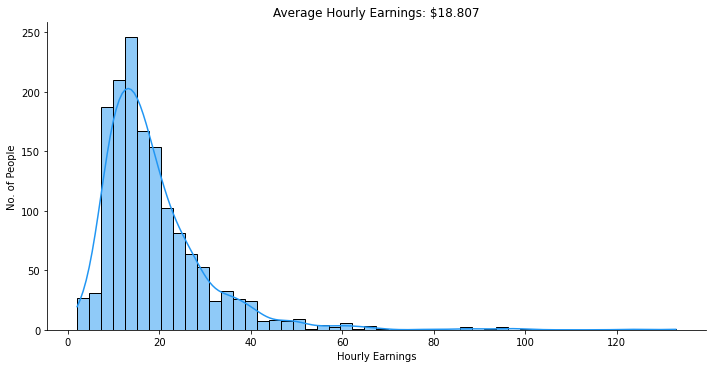

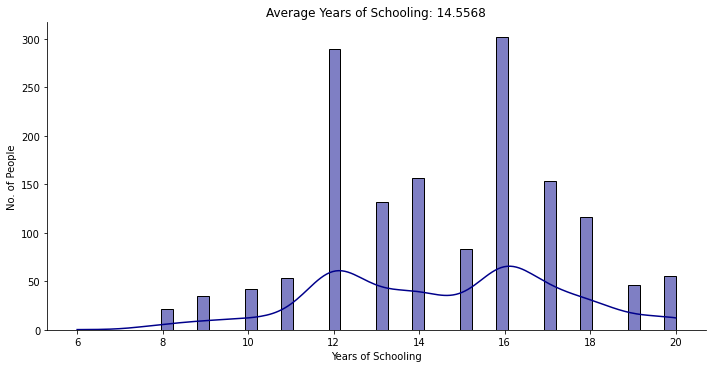

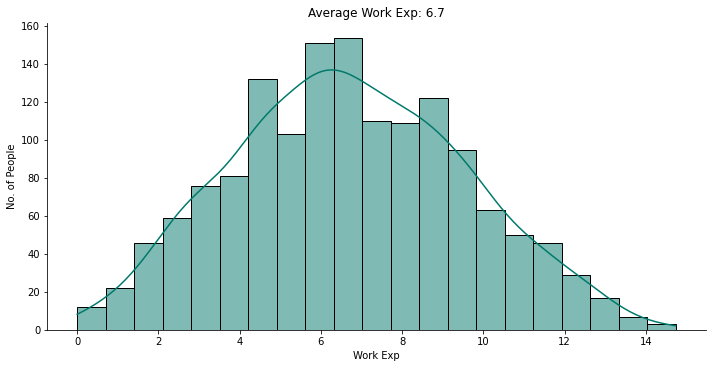

In [ ]:
sns.displot(df_data['EARNINGS'], bins=50, aspect=2,kde=True, color='#2196f3')
plt.title(f'Average Hourly Earnings: ${(df_data.EARNINGS.mean()):.6}')
plt.xlabel('Hourly Earnings')
plt.ylabel('No. of People')
plt.show()

sns.displot(df_data['S'], bins=50, aspect=2,kde=True, color='darkblue')
plt.title(f'Average Years of Schooling: {df_data.S.mean():.6}')
plt.xlabel('Years of Schooling')
plt.ylabel('No. of People')
plt.show()

sns.displot(df_data.EXP, aspect=2,kde=True, color='#00796b')
plt.title(f'Average Work Exp: {df_data.EXP.mean():.2}')
plt.xlabel('Work Exp')
plt.ylabel('No. of People')
plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [ ]:
target = df_data['EARNINGS']
features = df_data.drop('EARNINGS', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


# Multivariable Regression
 

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.31


### Evaluate the Coefficients of the Model

In [ ]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
ID,-0.00
S,1.19
EXP,0.90
FEMALE,-34.01
MALE,-32.03
...,...
MSA11NO,-4.57
MSA11NCC,-4.28
MSA11CC,-3.42
MSA11NK,2.25


### Analyse the Estimated Values & Regression Residuals

In [ ]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

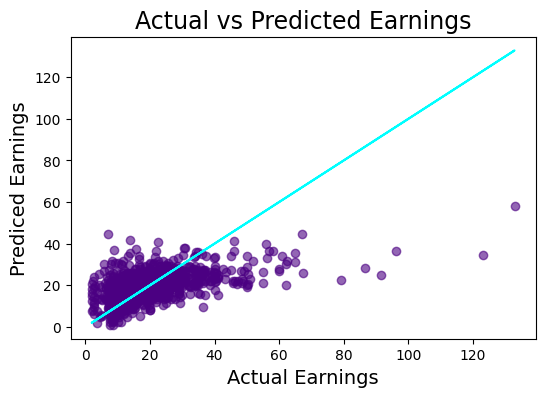

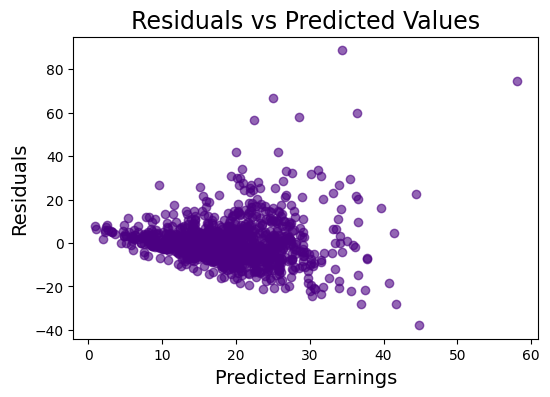

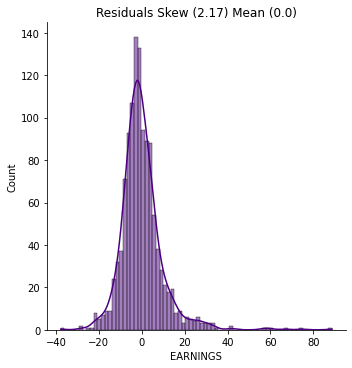

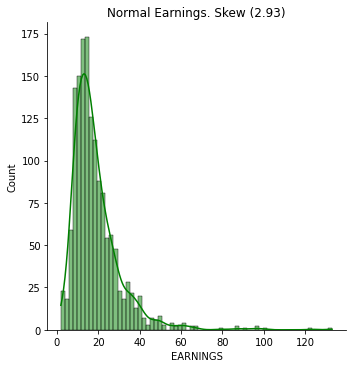

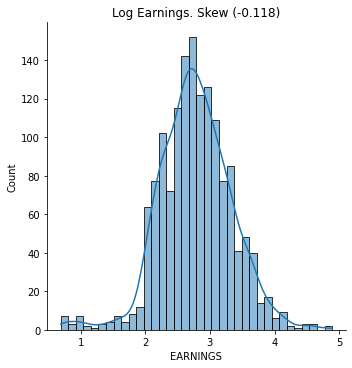

Training data r-squared: 0.34


In [ ]:
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Earnings', fontsize=17)
plt.xlabel('Actual Earnings', fontsize=14)
plt.ylabel('Prediced Earnings', fontsize=14)
plt.show()

plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)
sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

tgt_skew = df_data['EARNINGS'].skew()
sns.displot(df_data['EARNINGS'], kde='kde', color='green')
plt.title(f'Normal Earnings. Skew ({tgt_skew:.3})')
plt.show()

y_log = np.log(df_data['EARNINGS'])
sns.displot(y_log, kde=True)
plt.title(f'Log Earnings. Skew ({y_log.skew():.3})')
plt.show()

new_target = np.log(df_data['EARNINGS'])
features = df_data.drop('EARNINGS', axis=1)
X_train, X_test, log_y_train, log_y_test = train_test_split(features, new_target, test_size=0.2, random_state=10)
log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)
log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)
print(f'Training data r-squared: {log_rsquared:.2}')


# Use Your Model to Make a Prediction


In [ ]:
features = df_data.drop(['EARNINGS'], axis=1)
average_vals = features.mean().values
earning_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), columns=features.columns)
earning_stats


,ID,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,HHBMBF,HHBMOF,HHOMBF,HHBMONLY,HHBFONLY,HHOTHER,MSA97NO,MSA97NCC,MSA97CC,MSA97NK,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,PRFSTYAN,...,ASVABNO,ASVABCS,ASVABC,ASVABC4,VERBAL,ASVABMV,HEIGHT,WEIGHT04,WEIGHT11,SF,SM,SFR,SMR,SIBLINGS,REG97NE,REG97NC,REG97S,REG97W,RS97RURL,RS97URBN,RS97UNKN,JOBS,HOURS,TENURE,CATGOV,CATPRI,CATNPO,CATMIS,CATSE,COLLBARG,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,"3,547.13",14.56,6.70,0.49,0.51,"1,982.07",28.93,25.72,"47,252.43",293.07,0.67,0.09,0.02,0.18,0.03,0.01,0.20,0.53,0.26,0.01,0.12,0.11,0.77,0.01,0.00,0.08,0.31,0.09,0.39,0.07,0.04,5.61,3.51,0.11,0.29,0.10,0.24,0.10,0.19,0.12,...,0.15,0.15,0.21,0.20,0.17,"56,113.32",68.02,168.49,181.56,13.32,13.38,10.95,12.91,2.23,0.17,0.31,0.31,0.21,0.29,0.71,0.00,5.75,39.10,3.56,0.11,0.74,0.08,0.07,0.07,0.12,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00


In [ ]:
log_estimate = log_regr.predict(earning_stats)[0]

dollar_est = np.exp(log_estimate)
print(f'Hourly earnings is estimated to be ${dollar_est:.6}')

Hourly earnings is estimated to be $16.1572
